In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER='./data/'
PATHS_AND_GRAPH = DATA_FOLDER + 'wikispeedia_paths-and-graph/'
PATHS_FINISHED = PATHS_AND_GRAPH + 'paths_finished.tsv'
PATHS_UNFINISHED = PATHS_AND_GRAPH + 'paths_unfinished.tsv'

In [3]:
paths_finished = pd.read_csv(PATHS_FINISHED, sep='\t', header=None, names=['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating'], encoding='utf-8', skiprows=16).copy(deep=True)
paths_finished["timestamp"] = pd.to_datetime(paths_finished["timestamp"], unit='s')
paths_finished.head()

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,2011-02-15 03:26:49,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,2012-08-12 06:36:52,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,2012-10-03 21:10:40,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,2013-04-23 15:27:08,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0


In [4]:
paths_unfinished= pd.read_csv(PATHS_UNFINISHED, sep='\t', header=None, names=['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type'], encoding='utf-8', skiprows=17).copy(deep=True)
paths_unfinished["timestamp"] = pd.to_datetime(paths_unfinished["timestamp"], unit='s')
paths_unfinished.head()

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,2011-02-07 05:02:15,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,2011-02-07 05:14:11,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,2011-02-07 15:00:19,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,2011-02-07 16:06:01,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,2011-02-07 17:18:25,1808,Paraguay;Bolivia,Mount_St._Helens,timeout


In [5]:
paths_finished["backtrack"]=paths_finished['path'].str.count('<')
paths_unfinished["backtrack"]=paths_unfinished["path"].str.count('<')

d:\applications\miniconda3\envs\ada\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\applications\miniconda3\envs\ada\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


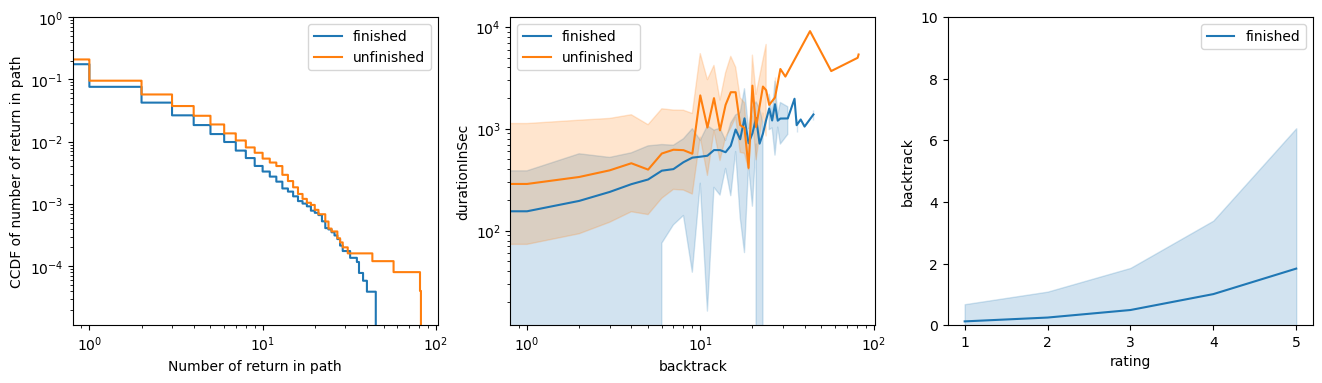

In [60]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
sns.ecdfplot(paths_finished["backtrack"], label='finished', ax=axs[0], complementary=True).set(xscale='log',yscale='log', ylabel='CCDF of number of return in path', xlabel='Number of return in path')
sns.ecdfplot(paths_unfinished["backtrack"], label='unfinished', ax=axs[0], complementary=True).set(xscale='log',yscale='log', ylabel='CCDF of number of return in path', xlabel='Number of return in path')
axs[0].legend()

sns.lineplot(paths_finished,x="backtrack",y="durationInSec", ax=axs[1],label="finished",errorbar="sd",estimator="median").set(xscale="log",yscale="log")
sns.lineplot(paths_unfinished,x="backtrack",y="durationInSec", ax=axs[1],label="unfinished",errorbar="sd",estimator="median").set(xscale="log",yscale="log")
#sns.scatterplot(paths_finished,x="backtrack",y="durationInSec", ax=axs[1]).set(xscale="log",yscale="log")
#sns.scatterplot(paths_unfinished,x="backtrack",y="durationInSec", ax=axs[1]).set(xscale="log",yscale="log")
axs[1].legend()

sns.lineplot(paths_finished,x="rating",y="backtrack", ax=axs[2],label="finished",errorbar="sd").set(ylim=(0,10))
axs[2].legend()